<a href="https://colab.research.google.com/github/NUELBUNDI/Principles_Data_Science/blob/main/research_customersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")



In [34]:
data=pd.read_csv("https://raw.githubusercontent.com/NUELBUNDI/DSA_Python_Projects/main/train.csv",sep = ';')
data['Age']=data['age']


In [35]:
data.drop(data.columns[0], inplace=True, axis=1)
print("Database has {} obserwations (customers) and {} columns (attributes).".format(data.shape[0],data.shape[1]))
print("Missing values in each column:\n{}".format(data.isnull().sum()))
print("Columns data types:\n{}".format(data.dtypes))

Database has 45211 obserwations (customers) and 17 columns (attributes).
Missing values in each column:
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
Age          0
dtype: int64
Columns data types:
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
Age           int64
dtype: object


In [36]:
# Check  Unique values
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
Age            77
dtype: int64


In [37]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


In [38]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="balance",y="duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="balance", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()
  

<Figure size 720x576 with 0 Axes>

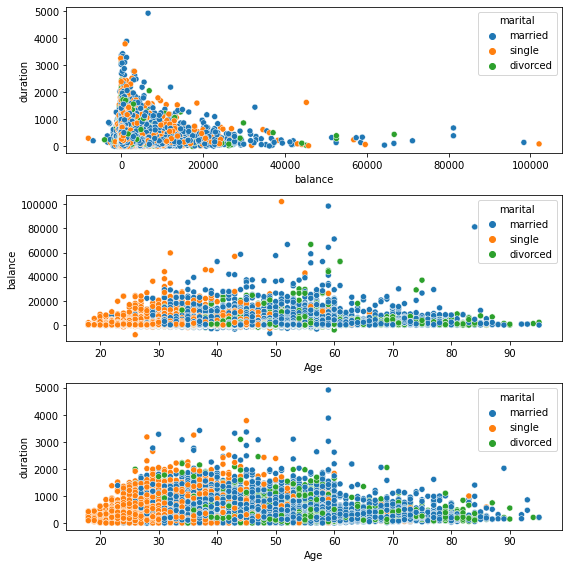

In [40]:
plt.figure(figsize=(10,8))
scatters(data, h="marital")
plt.show()


<Figure size 720x576 with 0 Axes>

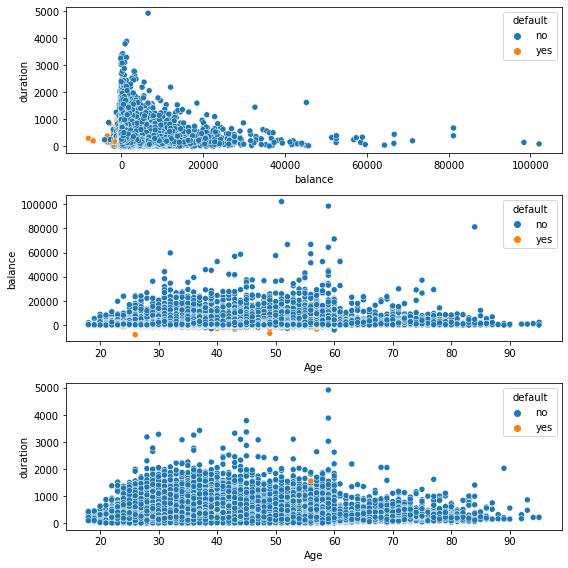

In [42]:
plt.figure(figsize=(10,8))
scatters(data, h="default")
plt.show()

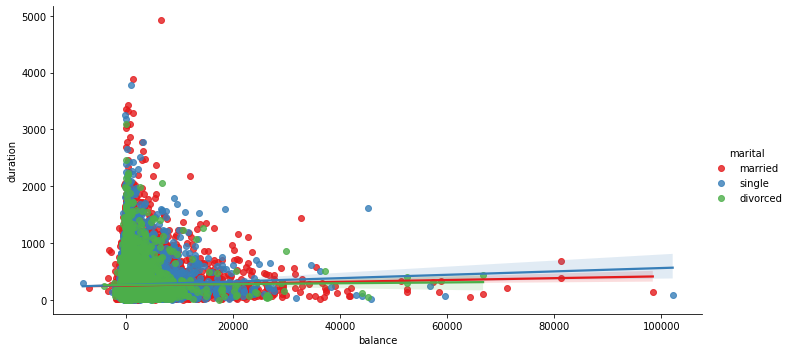

In [47]:
sns.lmplot(x="balance",y="duration", hue="marital", data=data, palette="Set1", aspect=2)
plt.show()